# The numpy.random package

In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
rng = np.random.default_rng()

## What is numpy.random?

### "Simple random data" functions

#### integers

In [13]:
rng.integers(5, size = 20)

array([0, 1, 1, 4, 2, 0, 4, 3, 3, 0, 0, 2, 4, 3, 4, 0, 4, 2, 4, 2],
      dtype=int64)

#### random

In [4]:
rng.random(size = 20)

array([0.67434731, 0.84152429, 0.46875767, 0.79301905, 0.96892531,
       0.6490917 , 0.59434932, 0.52998682, 0.82146958, 0.4576029 ,
       0.16202685, 0.17615017, 0.28753352, 0.70343635, 0.34627634,
       0.80725159, 0.05367254, 0.40568319, 0.07504424, 0.3787318 ])

#### choice

In [5]:
rng.choice(10, 3)

array([1, 3, 8], dtype=int64)

In [6]:
colours = ["red", "blue", "green", "black", "yellow"]

In [7]:
rng.choice(colours)

'black'

#### bytes

In [8]:
rng.bytes(5)

b'\xdf\xb4\xb5\xef\xcf'

### "Permutations" functions

In [ ]:
# Explain In-place vs. copy differences between below functions

#### shuffle

In [9]:
digits = np.arange(10)

In [10]:
digits

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
rng.shuffle(digits)

In [12]:
digits

array([4, 7, 9, 2, 8, 0, 6, 1, 3, 5])

In [34]:
three_by_three = np.arange(9).reshape(3, 3)

In [35]:
three_by_three

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [39]:
# Using shuffle on an array will rearrange the position of rows
# but will leave the items from each row in the original order

In [40]:
rng.shuffle(three_by_three)

In [41]:
three_by_three

array([[6, 7, 8],
       [3, 4, 5],
       [0, 1, 2]])

#### permutation

In [14]:
rng.permutation(10)

array([1, 9, 0, 2, 3, 7, 4, 8, 5, 6])

#### permuted

In [45]:
# Unlike Shuffle, Permuted will rearrange the order of items
# Within each row. Permuted also requires a new variable.
# If we reuse the same array we used Shuffle
# on earlier, we can see the difference bewtween Shuffle and 
# Permuted

In [46]:
permuted_three_by_three = rng.permuted(three_by_three, axis=1)

In [47]:
permuted_three_by_three

array([[6, 7, 8],
       [4, 3, 5],
       [2, 0, 1]])

In [49]:
# The original array can be passed in as an argument if we want it to 
# match the output of the permuted array

In [50]:
permuted_three_by_three = rng.permuted(three_by_three, axis=1, out=three_by_three)

In [51]:
three_by_three

array([[7, 6, 8],
       [5, 3, 4],
       [2, 1, 0]])

In [52]:
permuted_three_by_three

array([[7, 6, 8],
       [5, 3, 4],
       [2, 1, 0]])

In [53]:
three_by_three is permuted_three_by_three

True

## Distributions

#### binomial

In [ ]:
# 

In [60]:
# n is the number of trials 
n = 20

# p = probability of success, which must be between 0 and 1. 
# For example, a fair coin has a 50/50 change of being either heads of tails
# Therefore to simulate a fair coin, p = 0.5
p = 0.5

In [61]:
# The third argument is the number of tests. 
# That means in this example, a coin is flipped 20 times
# And there is 1000 instances of this
coin_flip = rng.binomial(n, p, 100)

In [62]:
# We can take the resulting array as giving us the number of heads
# After every 20 coin flips
coin_flip

array([10, 10,  9,  8,  6,  7,  8, 14, 12,  8, 12,  6, 11,  9, 12, 11, 10,
       12,  7, 13, 13,  6, 13, 10, 10, 11,  6, 10, 12, 10,  8, 13,  8,  8,
        9, 14, 12,  8, 11, 10,  9, 12, 10,  9, 11, 11,  9, 12,  9,  8, 12,
       11,  9, 10, 13, 12, 13, 12,  6, 11, 13, 13, 11,  9,  9, 13, 10,  8,
       14, 11,  8, 12, 10, 10, 11, 10, 13,  6, 14, 11, 10, 10,  5, 10, 10,
       14,  9, 11,  9,  9,  8,  9,  9,  9,  8, 10,  7, 10,  9, 12],
      dtype=int64)

(array([ 1.,  6.,  3., 12., 17., 20., 13., 13., 10.,  5.]),
 array([ 5. ,  5.9,  6.8,  7.7,  8.6,  9.5, 10.4, 11.3, 12.2, 13.1, 14. ]),
 <BarContainer object of 10 artists>)

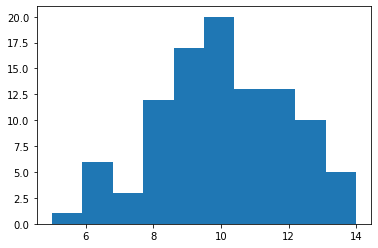

In [63]:
plt.hist(coin_flip)

#### normal

#### uniform

#### poisson

#### exponential

## Seeds

## References